# Practice Assignment: Understanding Distributions Through Sampling

** *This assignment is optional, and I encourage you to share your solutions with me and your peers in the discussion forums!* **


To complete this assignment, create a code cell that:
* Creates a number of subplots using the `pyplot subplots` or `matplotlib gridspec` functionality.
* Creates an animation, pulling between 100 and 1000 samples from each of the random variables (`x1`, `x2`, `x3`, `x4`) for each plot and plotting this as we did in the lecture on animation.
* **Bonus:** Go above and beyond and "wow" your classmates (and me!) by looking into matplotlib widgets and adding a widget which allows for parameterization of the distributions behind the sampling animations.


Tips:
* Before you start, think about the different ways you can create this visualization to be as interesting and effective as possible.
* Take a look at the histograms below to get an idea of what the random variables look like, as well as their positioning with respect to one another. This is just a guide, so be creative in how you lay things out!
* Try to keep the length of your animation reasonable (roughly between 10 and 30 seconds).

<IPython.core.display.Javascript object>


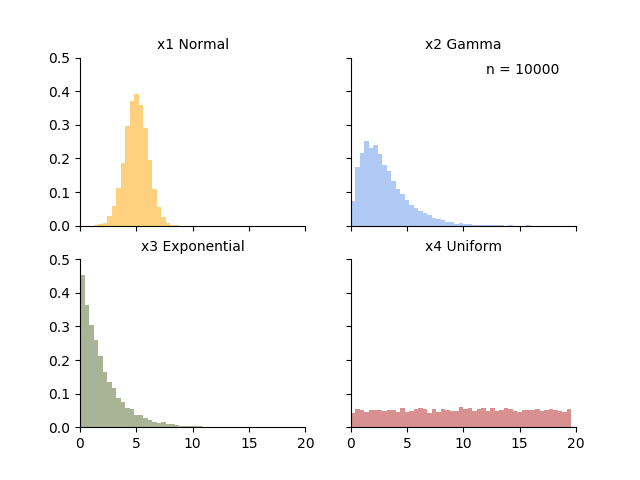

In [1]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np

%matplotlib notebook

sample_count = 10000
animation_step = 500
x_min = 0
x_max = 20

# generate 4 random variables from the random, gamma, exponential, and uniform distributions
x1 = np.random.normal(5, 1, sample_count)
x2 = np.random.gamma(2, 1.5, sample_count)
x3 = np.random.exponential(2, sample_count)
x4 = np.random.uniform(x_min, x_max, sample_count)

def update_animation(cur):
    ''' draw some graphs with increasing sample sizes for animations '''
    
    if cur == (sample_count/animation_step):
        a.event_source.stop()
    
    ax00.clear()
    ax00.spines['right'].set_visible(False)
    ax00.spines['top'].set_visible(False)
    ax00.tick_params(top='off', bottom='on', left='on', right='off', labelleft='on', labelbottom='on')

    ax01.clear()
    ax01.spines['right'].set_visible(False)
    ax01.spines['top'].set_visible(False)
    ax01.tick_params(top='off', bottom='on', left='on', right='off', labelleft='on', labelbottom='off')

    ax10.clear()
    ax10.spines['right'].set_visible(False)
    ax10.spines['top'].set_visible(False)
    ax10.tick_params(top='off', bottom='on', left='on', right='off', labelleft='off', labelbottom='on')

    ax11.clear()
    ax11.spines['right'].set_visible(False)
    ax11.spines['top'].set_visible(False)
    ax11.tick_params(top='off', bottom='on', left='on', right='off', labelleft='off', labelbottom='off')
    ax11.annotate('n = {}'.format(cur*animation_step), [12,0.45])

    plt.axis([x_min, x_max, 0, 0.5])
    
    # plot the histograms
    bins = np.arange(x_min, x_max, (x_max-x_min)/50) 
    ax01.hist(x1[:cur*animation_step], normed=True, bins=bins, color='orange', alpha=0.5)
    ax11.hist(x2[:cur*animation_step], normed=True, bins=bins, color='cornflowerblue', alpha=0.5)
    ax00.hist(x3[:cur*animation_step], normed=True, bins=bins, color='darkolivegreen', alpha=0.5)
    ax10.hist(x4[:cur*animation_step], normed=True, bins=bins, color='firebrick', alpha=0.5)

    ax11.set_title('x2 Gamma', fontsize='medium')
    ax10.set_title('x4 Uniform', fontsize='medium')
    ax01.set_title('x1 Normal', fontsize='medium')
    ax00.set_title('x3 Exponential', fontsize='medium')
    
fig, ((ax01, ax11), (ax00, ax10)) = plt.subplots(2, 2, sharex=True, sharey=True)
a = animation.FuncAnimation(fig, update_animation, interval=500)